In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
from numpy.random import seed
from numpy.random import randn
from numpy.random import normal
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv("data/top_10000_1960-now.csv")

In [5]:
df.shape

(9999, 35)

In [6]:
df.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,Disc Number,Track Number,Track Duration (ms),Track Preview URL,Explicit,Popularity,ISRC,Added By,Added At,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,1,3,216270,NaN,False,0,QMARG1760056,spotify:user:bradnumber1,2020-03-05T09:20:39Z,"acid house,ambient house,big beat,hip house",0.617,0.872,8.0,-12.305,1.0,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,1,3,237120,https://p.scdn.co/mp3-preview/d6f8883fc955cb0e...,False,64,USJAY0900144,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"dance pop,miami hip hop,pop",0.825,0.743,2.0,-5.995,1.0,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,1,6,312533,https://p.scdn.co/mp3-preview/1de5faef947224dc...,False,56,USJI19910455,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"dance pop,pop",0.677,0.665,7.0,-5.171,1.0,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,1,11,233400,https://p.scdn.co/mp3-preview/c4df3a832509cc55...,False,42,GB5KW1499822,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"album rock,art rock,british invasion,classic r...",0.683,0.728,9.0,-8.920,1.0,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,1,9,448720,NaN,False,0,USA176910100,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"album rock,british invasion,classic rock,rock",0.319,0.627,0.0,-9.611,1.0,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [7]:
df.columns

Index(['Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number', 'Track Duration (ms)',
       'Track Preview URL', 'Explicit', 'Popularity', 'ISRC', 'Added By',
       'Added At', 'Artist Genres', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Time Signature', 'Album Genres',
       'Label', 'Copyrights'],
      dtype='object')

In [8]:
df.describe()

,Disc Number,Track Number,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres
count,9999.000000,9999.000000,9.999000e+03,9999.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,0.0
mean,1.035104,4.957096,2.248150e+05,37.624662,0.607925,0.683281,5.167750,-7.269217,0.698410,0.065138,0.208589,0.029331,0.185777,0.585459,121.496650,3.960488,NaN
std,0.327856,5.502810,5.410012e+04,29.460808,0.145869,0.191131,3.578392,3.281731,0.458971,0.061324,0.248842,0.123576,0.149194,0.239105,26.260686,0.250927,NaN
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000020,0.000000,-29.368000,0.000000,0.000000,0.000003,0.000000,0.012000,0.000000,0.000000,0.000000,NaN
25%,1.000000,1.000000,1.925795e+05,0.000000,0.515000,0.560000,2.000000,-9.070000,0.000000,0.033100,0.018400,0.000000,0.089200,0.398000,102.642000,4.000000,NaN
50%,1.000000,3.000000,2.199060e+05,42.000000,0.617000,0.712000,5.000000,-6.518000,1.000000,0.042900,0.095600,0.000006,0.128000,0.598000,120.653000,4.000000,NaN
75%,1.000000,7.000000,2.502600e+05,64.000000,0.710000,0.835000,8.000000,-4.887000,1.000000,0.067500,0.318000,0.000561,0.245000,0.783000,134.328000,4.000000,NaN
max,15.000000,93.000000,1.561133e+06,98.000000,0.988000,0.997000,11.000000,2.769000,1.000000,0.711000,0.991000,0.985000,0.989000,0.995000,217.913000,5.000000,NaN


In [10]:
df.drop(df.columns[df.isnull().mean() > 0.40], axis=1, inplace=True)

In [11]:
for column in df.columns:
    print(column, df[column].isna().sum())

Track URI 0
Track Name 1
Artist URI(s) 2
Artist Name(s) 1
Album URI 2
Album Name 1
Album Artist URI(s) 2
Album Artist Name(s) 2
Album Release Date 2
Album Image URL 4
Disc Number 0
Track Number 0
Track Duration (ms) 0
Track Preview URL 2897
Explicit 0
Popularity 0
ISRC 3
Added By 0
Added At 0
Artist Genres 550
Danceability 2
Energy 2
Key 2
Loudness 2
Mode 2
Speechiness 2
Acousticness 2
Instrumentalness 2
Liveness 2
Valence 2
Tempo 2
Time Signature 2
Label 6
Copyrights 24


In [43]:
df.dtypes

Track URI                object
Track Name               object
Artist URI(s)            object
Artist Name(s)           object
Album URI                object
Album Name               object
Album Artist URI(s)      object
Album Artist Name(s)     object
Album Release Date       object
Album Image URL          object
Disc Number               int64
Track Number              int64
Track Duration (ms)       int64
Track Preview URL        object
Explicit                   bool
Popularity                int64
ISRC                     object
Added By                 object
Added At                 object
Artist Genres            object
Danceability            float64
Energy                  float64
Key                     float64
Loudness                float64
Mode                    float64
Speechiness             float64
Acousticness            float64
Instrumentalness        float64
Liveness                float64
Valence                 float64
Tempo                   float64
Time Sig

In [44]:
int_float_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[int_float_columns] = df[int_float_columns].fillna(df[int_float_columns].mean())

In [46]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].fillna(df[object_columns].mode().iloc[0])

In [12]:
sum(df.duplicated())

48

In [13]:
df = df[~df.duplicated()].reset_index(drop=True)

In [17]:
df.nunique()

Track URI               9951
Track Name              8258
Artist URI(s)           4134
Artist Name(s)          4129
Album URI               7462
Album Name              6636
Album Artist URI(s)     3298
Album Artist Name(s)    3294
Album Release Date      3332
Album Image URL         7460
Disc Number               10
Track Number              57
Track Duration (ms)     7320
Track Preview URL       6889
Explicit                   2
Popularity                99
ISRC                    8948
Added By                   1
Added At                 609
Artist Genres           2815
Danceability             779
Energy                   876
Key                       12
Loudness                6329
Mode                       2
Speechiness             1059
Acousticness            2746
Instrumentalness        3028
Liveness                1361
Valence                  994
Tempo                   8621
Time Signature             5
Label                   1465
Copyrights              5378
dtype: int64

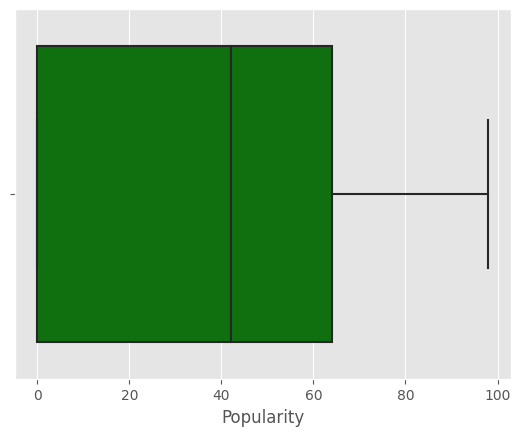

In [47]:
sns.boxplot(x = 'Popularity', data = df, color = 'green')
plt.show()

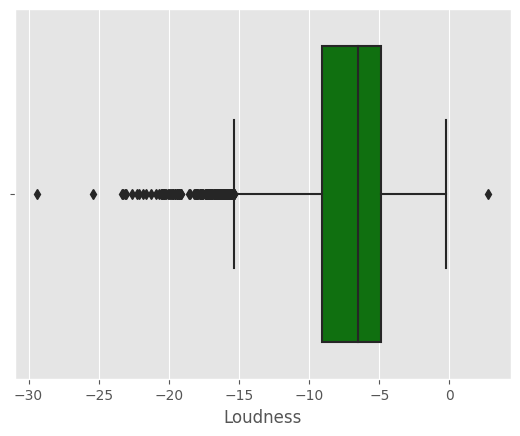

In [49]:
sns.boxplot(x = 'Loudness', data = df, color = 'green')
plt.show()

In [51]:
Q1 = df['Loudness'].quantile(0.25)
Q3 = df['Loudness'].quantile(0.75)
IQR = Q3 - Q1

filter = (df['Loudness'] >= Q1 - 1.5 * IQR) & (df['Loudness'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

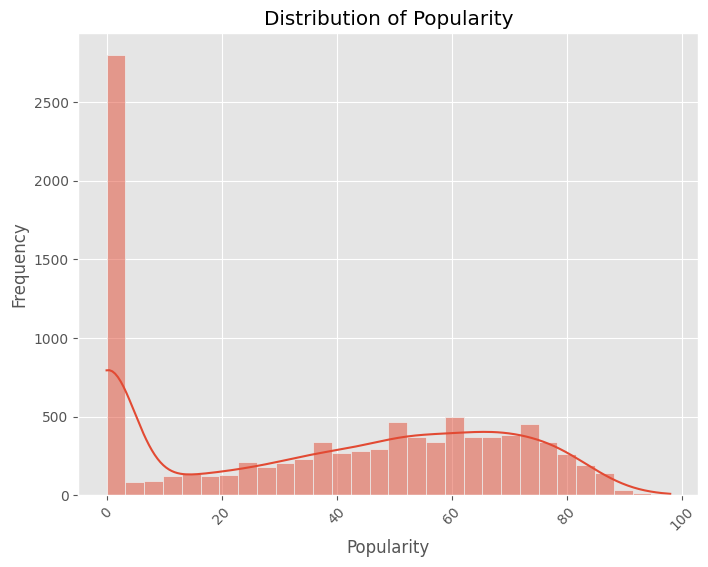

In [61]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Popularity', bins=30, kde=True)
plt.ylabel('Frequency')
plt.title('Distribution of Popularity')
plt.xticks(rotation=45)
plt.show()


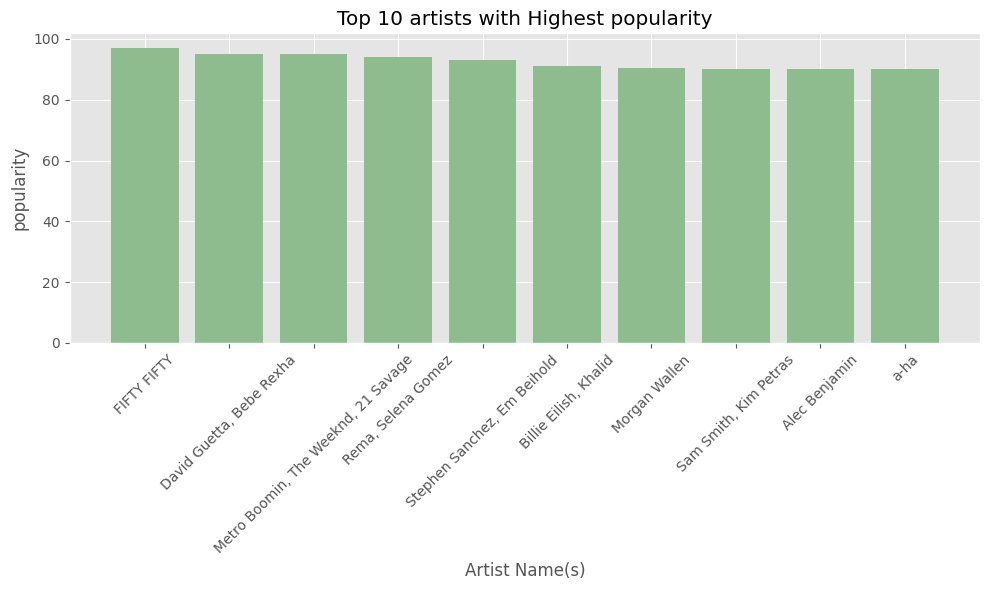

In [54]:
artists = df.groupby('Artist Name(s)')
popu = artists['Popularity'].mean()
sortedpopu = popu.sort_values(ascending=False)
top10 = sortedpopu.head(10)


plt.figure(figsize=(10, 6))
plt.bar(top10.index, top10.values, color='darkseagreen')
plt.xlabel('Artist Name(s)')
plt.ylabel('popularity')
plt.title('Top 10 artists with Highest popularity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


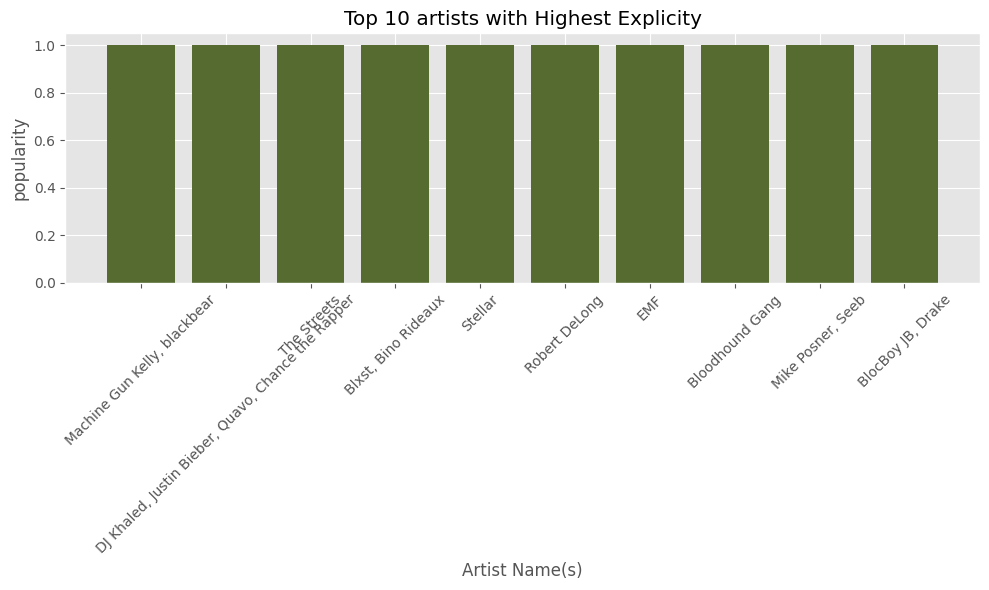

In [56]:
artists = df.groupby('Artist Name(s)')
popu = artists['Explicit'].mean()
sortedpopu = popu.sort_values(ascending=False)
top10 = sortedpopu.head(10)


plt.figure(figsize=(10, 6))
plt.bar(top10.index, top10.values, color='darkolivegreen')
plt.xlabel('Artist Name(s)')
plt.ylabel('popularity')
plt.title('Top 10 artists with Highest Explicity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


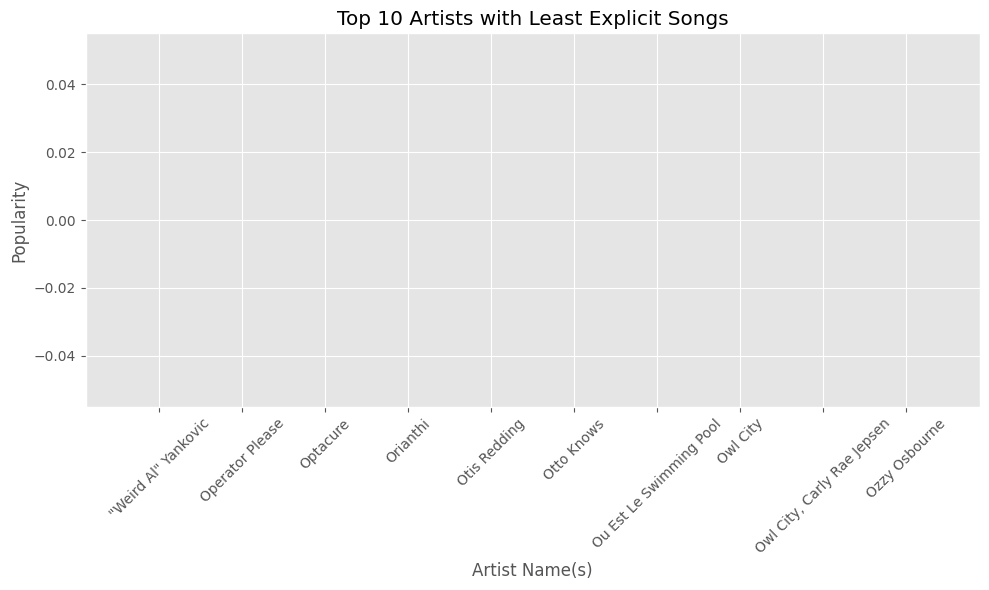

In [62]:
artists = df.groupby('Artist Name(s)')
popu = artists['Explicit'].mean()
sortedpopu = popu.sort_values(ascending=True)
bottom10 = sortedpopu.head(10) 

plt.figure(figsize=(10, 6))
plt.bar(bottom10.index, bottom10.values, color='darkolivegreen')
plt.xlabel('Artist Name(s)')
plt.ylabel('Popularity')
plt.title('Top 10 Artists with Least Explicit Songs')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
artists = df.groupby('Artist Name(s)')
popu = artists['Explicit'].mean()
sortedpopu = popu.sort_values(ascending=False)
top10 = sortedpopu.head(10)


plt.figure(figsize=(10, 6))
plt.bar(top10.index, top10.values, color='darkseagreen')
plt.xlabel('Artist Name(s)')
plt.ylabel('popularity')
plt.title('Top 10 artists with Highest Explicity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### 1 :
#### Null Hypothesis (H0):  
average popularity is equal to 20.
#### Alternative Hypothesis (H1):  
average popularity is not equal to 20.

In [23]:
from scipy.stats import ttest_1samp

pop = df['Popularity']
null_hypothesis_mean = 30
t_statistic, p_value = ttest_1samp(pop, null_hypothesis_mean)
print(f"T-Statistic value: {t_statistic}")
print("P-value", p_value)


T-Statistic value: 25.617228354657932
P-value 3.219085528924617e-140


given the result , the null hypothesis is strongly rejected.

### 2 :
#### Null Hypothesis (H0):  
hozier and metallica have approximately equal amount of popularity.
#### Alternative Hypothesis (H1):  
hozier and metallica do not have approximately equal amount of popularity.

In [38]:
hozier_df = df[df['Artist Name(s)'] == 'Hozier'].copy()
metallica_df = df[df['Artist Name(s)'] == 'Metallica'].copy()

In [39]:
t_stat, p_value = ttest_ind(hozier_df['Popularity'], metallica_df['Popularity'])
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  4.007032802609447
P-Value:  0.0008267775442258307


given the small amount of p value. it strongly rejects the p-value indicating a significant difference in metallica and hozier popularity.

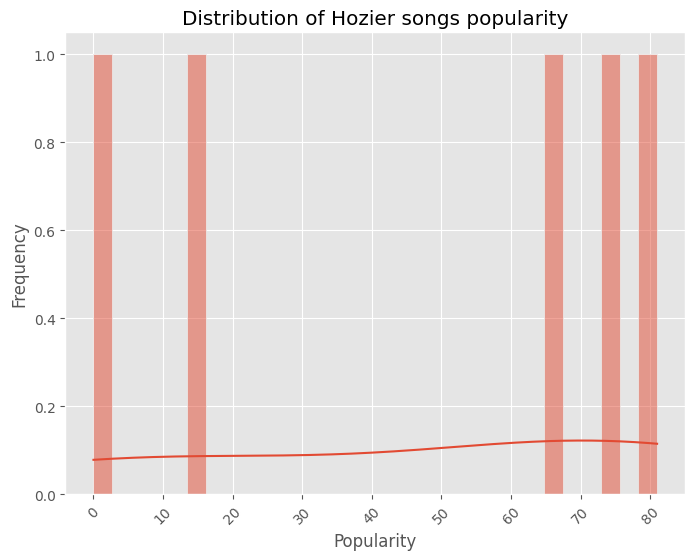

In [63]:
plt.figure(figsize=(8, 6))
sns.histplot(data=hozier_df, x='Popularity', bins=30, kde=True)
plt.ylabel('Frequency')
plt.title('Distribution of Hozier songs popularity')
plt.xticks(rotation=45)
plt.show()


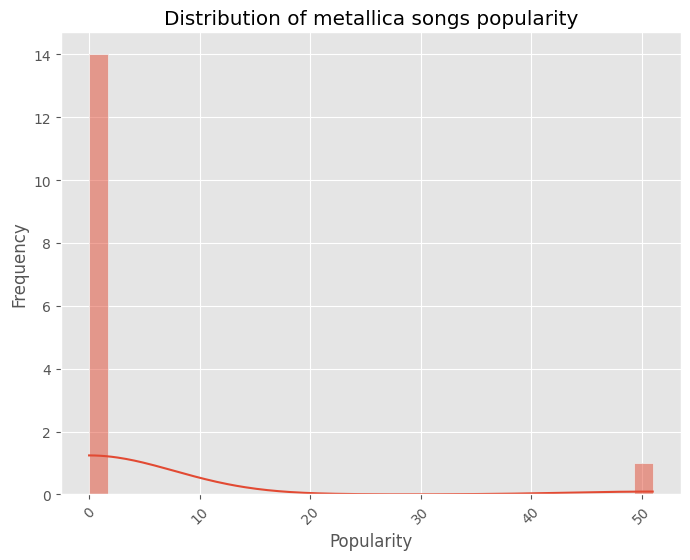

In [65]:
plt.figure(figsize=(8, 6))
sns.histplot(data=metallica_df, x='Popularity', bins=30, kde=True)
plt.ylabel('Frequency')
plt.title('Distribution of metallica songs popularity')
plt.xticks(rotation=45)
plt.show()


In [67]:
from scipy.stats import f_oneway

grouped_data = []

for category in df['Explicit'].unique():
    group = df[df['Explicit'] == category]['Popularity']
    grouped_data.append(group)

f_statistic, p_value = f_oneway(*grouped_data)

print(f"F-Statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-Statistic: 29.552765838167154
P-value: 5.5730349958131237e-08


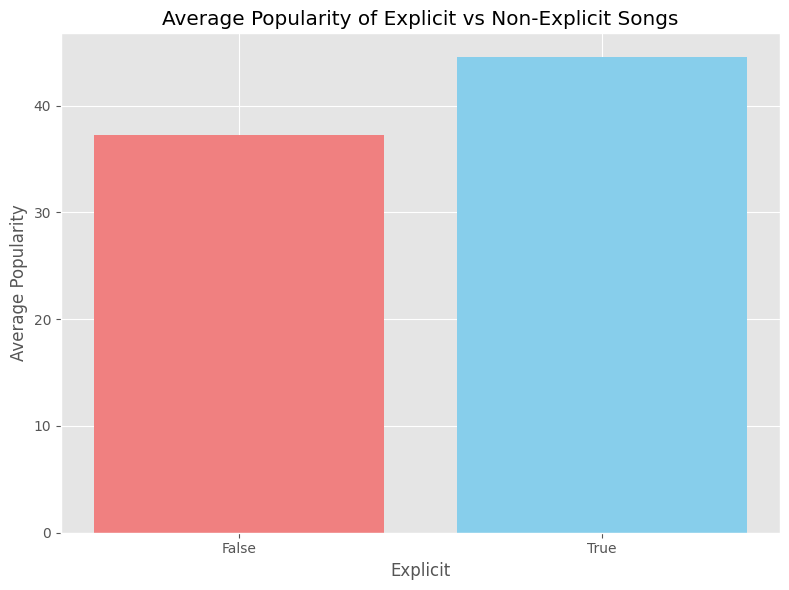

In [70]:
import matplotlib.pyplot as plt

avg_popularity = df.groupby('Explicit')['Popularity'].mean()

plt.figure(figsize=(8, 6))
plt.bar(avg_popularity.index, avg_popularity.values, color=['lightcoral', 'skyblue'])
plt.xlabel('Explicit')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Explicit vs Non-Explicit Songs')
plt.xticks([0, 1], ['False', 'True'])

plt.tight_layout()
plt.show()


### 4 :
#### Null Hypothesis (H0):  
hozier popularity is normally distributed. 
#### Alternative Hypothesis (H1):  
hozier popularity is not normally distributed. 

In [74]:
from scipy.stats import shapiro

statistic, p_value = shapiro(hozier_df['Popularity'])

print(f"Test Statistic: {statistic}")
print("p-value", p_value)

Test Statistic: 0.844019889831543
p-value 0.17634379863739014


we failed to reject the null hypothesis

### 5 :
#### Null Hypothesis (H0):  
explicit songs and non explicit songs have equal amount of loudness.
#### Alternative Hypothesis (H1):  
explicit songs and non explicit songs do not have equal amount of loudness.

In [78]:
ex = df[df['Explicit'] == True].copy()
non_ex = df[df['Explicit'] == False].copy()

In [81]:
t_stat, p_value = ttest_ind(ex['Loudness'], non_ex['Loudness'])
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  10.277180174632681
P-Value:  1.1933254160360356e-24


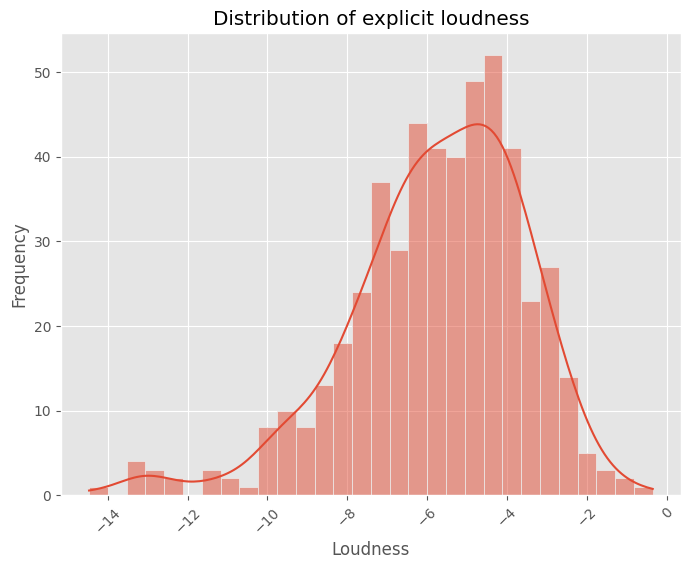

In [83]:
plt.figure(figsize=(8, 6))
sns.histplot(data=ex, x='Loudness', bins=30, kde=True)
plt.ylabel('Frequency')
plt.title('Distribution of explicit loudness')
plt.xticks(rotation=45)
plt.show()


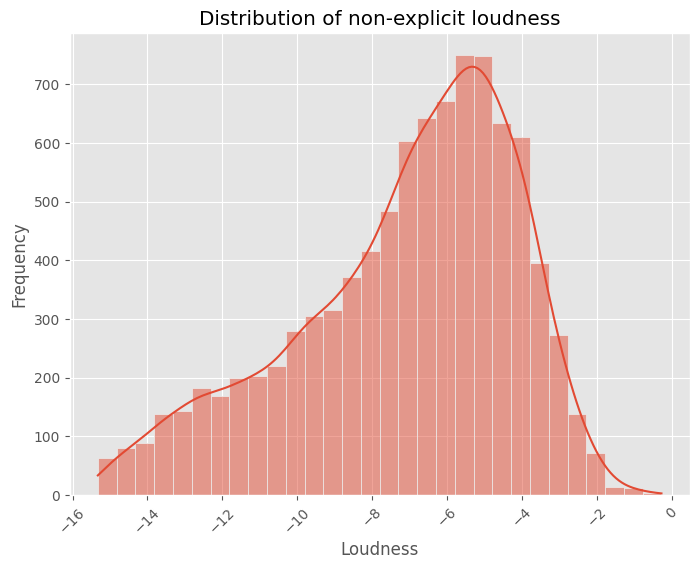

In [84]:
plt.figure(figsize=(8, 6))
sns.histplot(data=non_ex, x='Loudness', bins=30, kde=True)
plt.ylabel('Frequency')
plt.title('Distribution of non-explicit loudness')
plt.xticks(rotation=45)
plt.show()
